## How do I read my images?

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (20,10)

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from libs.datasets import get_dataset
from addict import Dict
import yaml
import sys

In [2]:
config_path = 'configs/voc12.yaml'
with open(config_path, 'r') as file:
    CONFIG = Dict(yaml.load(file, Loader=yaml.FullLoader))

for key in CONFIG:
    print(key + ": " + str(CONFIG[key]))
    print("--------")

EXP: {'ID': 'voc12', 'OUTPUT_DIR': 'data'}
--------
DATASET: {'NAME': 'vocaug', 'ROOT': 'VOCdevkit/', 'LABELS': './data/datasets/voc12/labels.txt', 'N_CLASSES': 21, 'IGNORE_LABEL': 255, 'SCALES': [0.5, 0.75, 1.0, 1.25, 1.5], 'SPLIT': {'TRAIN': 'train_aug', 'VAL': 'val', 'TEST': 'test'}}
--------
DATALOADER: {'NUM_WORKERS': 0}
--------
IMAGE: {'MEAN': {'R': 122.675, 'G': 116.669, 'B': 104.008}, 'SIZE': {'BASE': None, 'TRAIN': 321, 'TEST': 513}}
--------
MODEL: {'NAME': 'DeepLabV2_ResNet101_MSC', 'N_BLOCKS': [3, 4, 23, 3], 'ATROUS_RATES': [6, 12, 18, 24], 'INIT_MODEL': 'data/models/coco/deeplabv1_resnet101/caffemodel/deeplabv1_resnet101-coco.pth'}
--------
SOLVER: {'BATCH_SIZE': {'TRAIN': 5, 'TEST': 1}, 'ITER_MAX': 20000, 'ITER_SIZE': 2, 'ITER_SAVE': 5000, 'ITER_TB': 100, 'LR_DECAY': 10, 'LR': 0.00025, 'MOMENTUM': 0.9, 'OPTIMIZER': 'sgd', 'POLY_POWER': 0.9, 'WEIGHT_DECAY': 0.0005, 'AVERAGE_LOSS': 20}
--------
CRF: {'ITER_MAX': 10, 'POS_W': 3, 'POS_XY_STD': 1, 'BI_W': 4, 'BI_XY_STD': 67, 

In [3]:
print(CONFIG.DATASET.ROOT)
print(CONFIG.DATASET.SPLIT.TRAIN)

VOCdevkit/
train_aug


In [4]:
dataset = get_dataset(CONFIG.DATASET.NAME)(
        root=CONFIG.DATASET.ROOT,
        split=CONFIG.DATASET.SPLIT.TRAIN,
        ignore_label=CONFIG.DATASET.IGNORE_LABEL,
        mean_bgr=(CONFIG.IMAGE.MEAN.B, CONFIG.IMAGE.MEAN.G, CONFIG.IMAGE.MEAN.R),
        augment=True,
        base_size=CONFIG.IMAGE.SIZE.BASE,
        crop_size=CONFIG.IMAGE.SIZE.TRAIN,
        scales=CONFIG.DATASET.SCALES,
        flip=True)
#print(dataset)

In [8]:
CONFIG.DATASET.SPLIT

{'TRAIN': 'train_aug', 'VAL': 'val', 'TEST': 'test'}

In [13]:
from os import path as osp
if CONFIG.DATASET.SPLIT.TRAIN in ["train", "train_aug", "trainval", "trainval_aug", "val"]:
    print(
        "ImageSets/Segmentation", CONFIG.DATASET.SPLIT.TRAIN + ".txt"
    )
else:
    raise ValueError("Invalid split name: {}".format(CONFIG.DATASET.SPLIT.TRAIN))

ImageSets/Segmentation train_aug.txt


In [12]:
image_id, image, label = dataset._load_data(1)

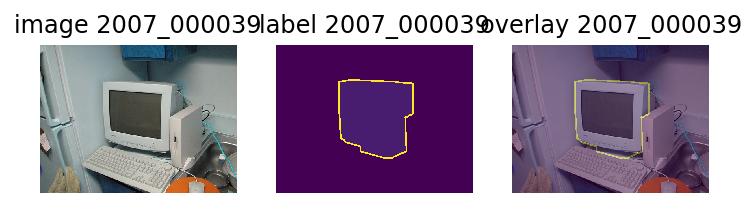

In [6]:
dataset.show_pair(image_id, image, label)